In [1]:
!pip install colorama


In [2]:
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

🎉 Welcome to the Bulls and Cows Game! 🎉
Rules:
- A secret number with unique digits has been chosen based on your difficulty level.
- Your goal is to guess the number.
- After each guess, you'll receive feedback:
  Bulls 🐂: Correct digit in the correct position.
  Cows 🐄: Correct digit but in the wrong position.
- Use logic and feedback to narrow down your guesses.

🎮 Choose Your Level:
1) Level 1 (4-digit number)
2) Level 2 (5-digit number)
3) Level 3 (6-digit number)
Enter your choice (1/2/3): 1

🟢 Level 1 Selected: A 4-digit number. Good Luck!

✨ Let the game begin!

--------------------------------------------------
🔢 Attempts left: 10
➡️  Enter your 4-digit guess: 1234
🐂 Bulls: 0 | 🐄 Cows: 2
🗒 Entropy (uncertainty): 10.4543 bits
ℹ️ Mutual Information: 1.8449 bits

--------------------------------------------------
🔢 Attempts left: 9
➡️  Enter your 4-digit guess: 6589
🐂 Bulls: 0 | 🐄 Cows: 2
🗒 Entropy (uncertainty): 10.4543 bits
ℹ️ Mutual Information: 1.8449 bits

------------------

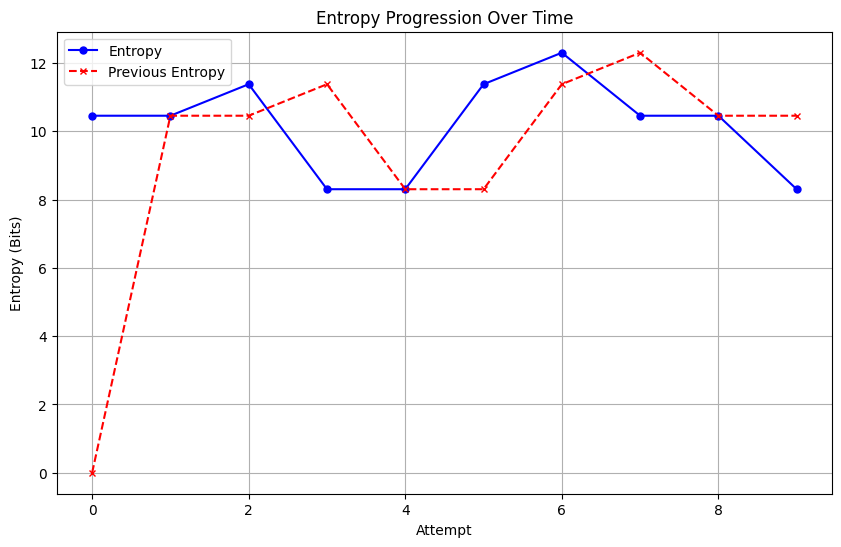

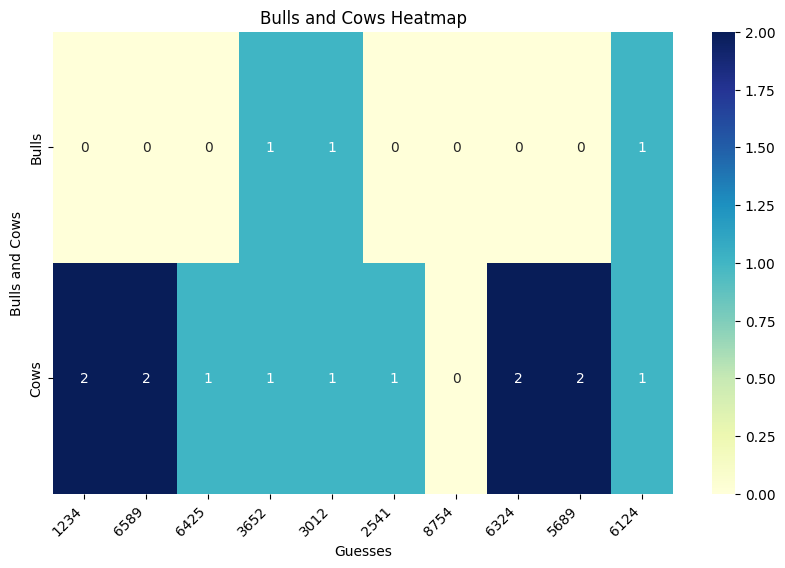

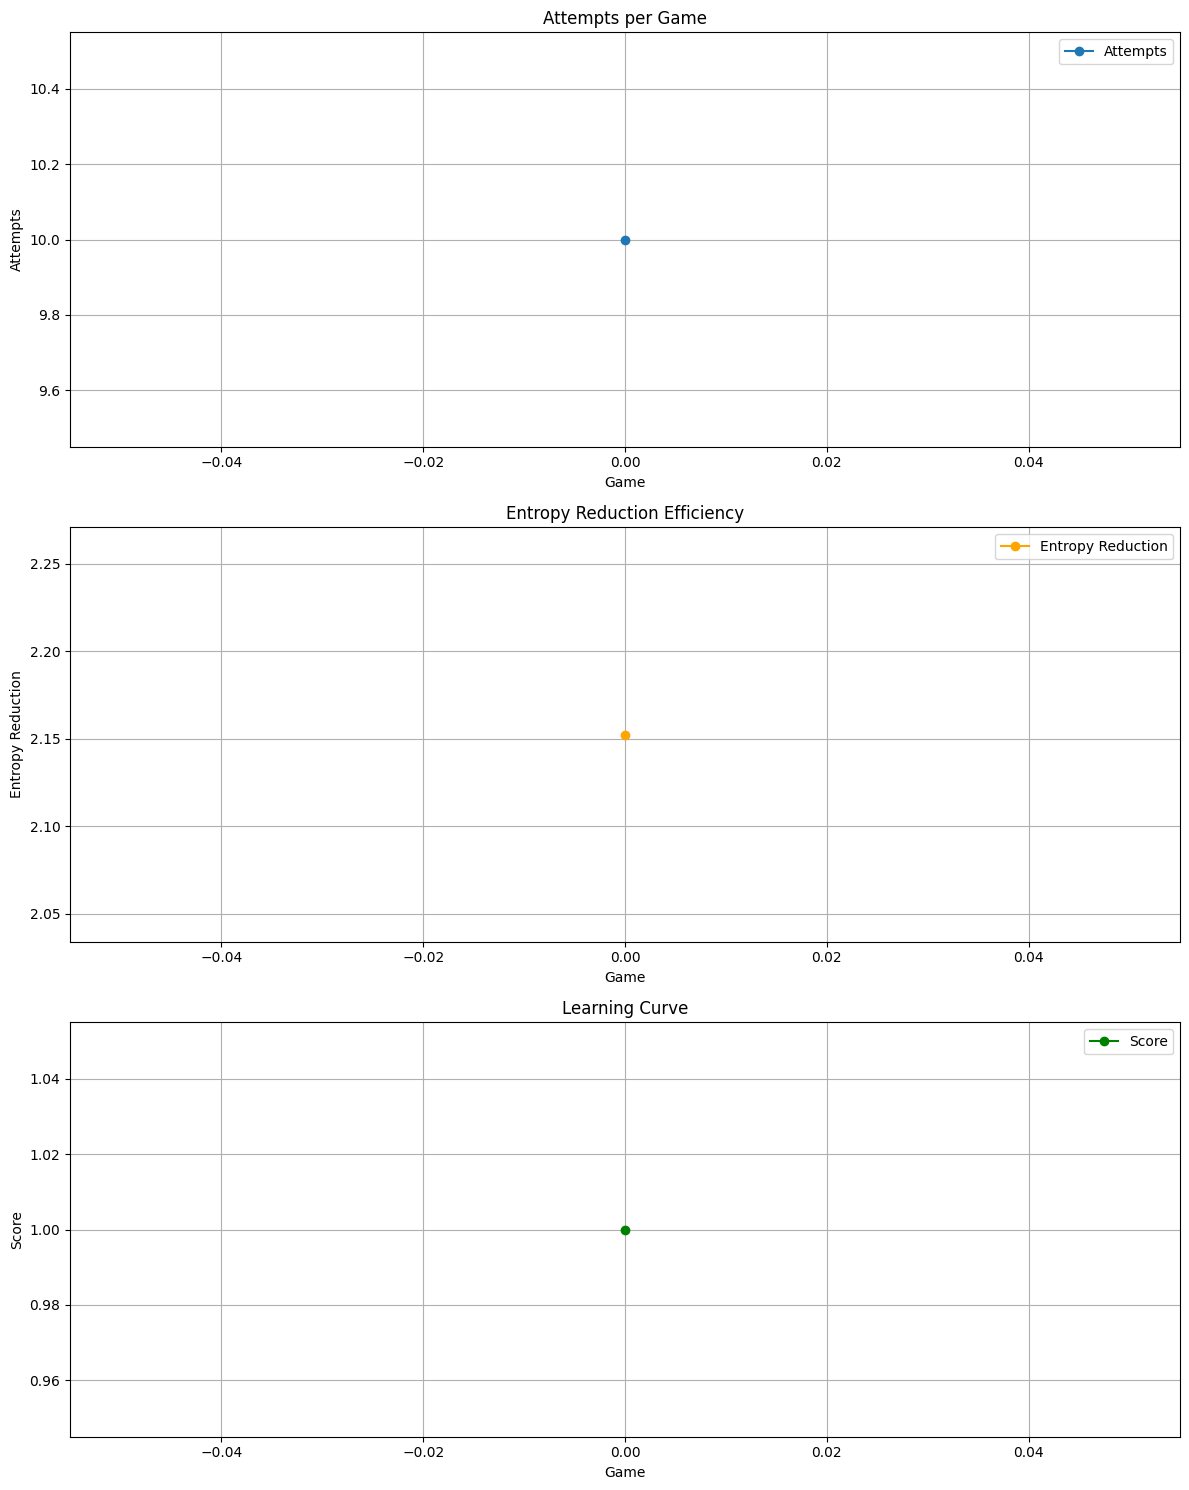

Would you like to play again? (Yes/no): no
Thank you for playing Bulls and Cows!


In [18]:
import random
import itertools
from colorama import Fore, Style
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Class to track game progress across multiple sessions
class GameTracker:
    def __init__(self):
        self.games_history = []

    def add_game(self, game_stats):
        """
        Track game statistics.
        game_stats: dict containing:
            - attempts
            - entropy_history
            - possible_numbers_history
            - final_score
        """
        self.games_history.append(game_stats)

    def visualize_progress(self):
        """Create comprehensive progress visualization across games"""
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

        # Plot average attempts per game
        attempts = [game['attempts'] for game in self.games_history]
        ax1.plot(attempts, marker="o", label="Attempts")
        ax1.set_title('Attempts per Game')
        ax1.set_xlabel('Game')
        ax1.set_ylabel('Attempts')
        ax1.grid(True)
        ax1.legend()

        # Plot entropy reduction efficiency
        entropy_efficiency = [
            game['entropy_history'][0] - game['entropy_history'][-1]
            for game in self.games_history
        ]
        ax2.plot(entropy_efficiency, marker="o", color="orange", label="Entropy Reduction")
        ax2.set_title('Entropy Reduction Efficiency')
        ax2.set_xlabel('Game')
        ax2.set_ylabel('Entropy Reduction')
        ax2.grid(True)
        ax2.legend()

        # Plot learning curve (final scores)
        scores = [game['final_score'] for game in self.games_history]
        ax3.plot(scores, marker="o", color="green", label="Score")
        ax3.set_title('Learning Curve')
        ax3.set_xlabel('Game')
        ax3.set_ylabel('Score')
        ax3.grid(True)
        ax3.legend()

        plt.tight_layout()
        plt.show()


def visualize_entropy_progress(entropy_history, previous_entropy_history):
    """Visualizes the change in entropy over time (game progress)."""
    plt.figure(figsize=(10, 6))
    plt.plot(entropy_history, label='Entropy', color='blue', marker='o', linestyle='-', markersize=5)
    plt.plot(previous_entropy_history, label='Previous Entropy', color='red', marker='x', linestyle='--', markersize=5)
    plt.title('Entropy Progression Over Time')
    plt.xlabel('Attempt')
    plt.ylabel('Entropy (Bits)')
    plt.legend()
    plt.grid(True)
    plt.show()

def create_bulls_cows_heatmap(guesses):
    """Generates a heatmap visualizing the number of bulls and cows for each guess."""
    # Prepare the data for the heatmap
    guess_list = list(guesses.keys())
    bulls_cows = [guesses[guess] for guess in guess_list]

    bulls = [bc[0] for bc in bulls_cows]
    cows = [bc[1] for bc in bulls_cows]

    # Create a DataFrame for better visualization
    df = pd.DataFrame({
        'Guess': guess_list,
        'Bulls': bulls,
        'Cows': cows
    })

    # Set up the plot
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[['Bulls', 'Cows']].T, annot=True, cmap="YlGnBu", cbar=True, xticklabels=df['Guess'], yticklabels=["Bulls", "Cows"])
    plt.title('Bulls and Cows Heatmap')
    plt.xlabel('Guesses')
    plt.ylabel('Bulls and Cows')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Function to calculate bulls and cows for a guess
def calculate_bulls_and_cows(secret, guess):
    bulls = sum(s == g for s, g in zip(secret, guess))
    cows = sum(min(secret.count(d), guess.count(d)) for d in set(guess)) - bulls
    return bulls, cows

# Function to generate a random secret number of specified length
def generate_secret_number(length):
    digits = list("0123456789")
    random.shuffle(digits)
    return "".join(digits[:length])

# Function to calculate entropy and mutual information
def calculate_entropy(possible_numbers, guess=None, bulls=None, cows=None):
    if len(possible_numbers) <= 1:
        return 0.0, 0.0

    probabilities = np.ones(len(possible_numbers)) / len(possible_numbers)
    base_entropy = -np.sum(probabilities * np.log2(probabilities))

    if guess is None:
        return base_entropy, 0.0

    total_digits = len(guess)
    position_info = bulls / total_digits
    digit_info = (bulls + cows) / total_digits
    mutual_info = base_entropy * (position_info * 0.7 + digit_info * 0.3)
    conditional_entropy = base_entropy - mutual_info

    return max(0, conditional_entropy), mutual_info

# Function to generate all possible numbers based on the current digits and guesses
def generate_possible_numbers(digits):
    # Generate all possible numbers of the specified length with unique digits
    all_possible = [''.join(p) for p in itertools.permutations('0123456789', digits)]
    return all_possible

# Function to allow the player to choose the difficulty level
def choose_difficulty():
    print("\n🎮 Choose Your Level:")
    print("1) Level 1 (4-digit number)")
    print("2) Level 2 (5-digit number)")
    print("3) Level 3 (6-digit number)")
    choice = input("Enter your choice (1/2/3): ").strip()

    if choice == "1":
        print("\n🟢 Level 1 Selected: A 4-digit number. Good Luck!")
        return 4  # Level 1 - 4 digits
    elif choice == "2":
        print("\n🟠 Level 2 Selected: A 5-digit number. Brace yourself!")
        return 5  # Level 2 - 5 digits
    elif choice == "3":
        print("\n🔴 Level 3 Selected: A 6-digit number. Challenge Accepted!")
        return 6  # Level 3 - 6 digits
    else:
        print(f"{Fore.RED}Invalid choice! Defaulting to Level 1.{Style.RESET_ALL}")
        return 4  # Default to Level 1

# Main game function
def bulls_and_cows_game():
    print(f"{Fore.CYAN}🎉 Welcome to the Bulls and Cows Game! 🎉{Style.RESET_ALL}")
    print("Rules:")
    print("- A secret number with unique digits has been chosen based on your difficulty level.")
    print("- Your goal is to guess the number.")
    print("- After each guess, you'll receive feedback:")
    print("  Bulls 🐂: Correct digit in the correct position.")
    print("  Cows 🐄: Correct digit but in the wrong position.")
    print("- Use logic and feedback to narrow down your guesses.")

    # Set difficulty level
    DIGITS = choose_difficulty()
    secret_number = generate_secret_number(DIGITS)
    MAX_ATTEMPTS = 10
    attempts = 0
    guesses = {}
    entropy_history = []
    possible_numbers_history = []

    print("\n✨ Let the game begin!")
    while True:
        print("\n" + "-" * 50)
        print(f"🔢 Attempts left: {MAX_ATTEMPTS - attempts}")

        if attempts >= MAX_ATTEMPTS:
            print(f"{Fore.RED}😞 You've reached the maximum attempts!{Style.RESET_ALL}")
            print(f"The correct number was {Fore.CYAN}{secret_number}{Style.RESET_ALL}. Better luck next time!")
            break

        # Input guess
        guess = input(f"➡️  Enter your {DIGITS}-digit guess: ").strip()
        if len(guess) != DIGITS or not guess.isdigit() or len(set(guess)) != len(guess):
            print(f"{Fore.RED}❌ Invalid input! Please enter a {DIGITS}-digit number with unique digits.{Style.RESET_ALL}")
            continue

        # Calculate bulls and cows
        bulls, cows = calculate_bulls_and_cows(secret_number, guess)
        attempts += 1
        guesses[guess] = (bulls, cows)

        print(f"{Fore.GREEN}🐂 Bulls: {bulls} | {Fore.YELLOW}🐄 Cows: {cows}{Style.RESET_ALL}")

        # Calculate entropy and mutual information
        possible_numbers = generate_possible_numbers(DIGITS)
        conditional_entropy, mutual_info = calculate_entropy(possible_numbers, guess, bulls, cows)
        entropy_history.append(conditional_entropy)
        possible_numbers_history.append(len(possible_numbers))

        print(f"🗒 Entropy (uncertainty): {conditional_entropy:.4f} bits")
        print(f"ℹ️ Mutual Information: {mutual_info:.4f} bits")

        # Check win condition
        if bulls == DIGITS:
            print(f"{Fore.GREEN}🎉 You guessed the number in {attempts} attempts! The secret number was {secret_number}.{Style.RESET_ALL}")
            break

    # Visualizations for the current game
    visualize_entropy_progress(entropy_history, [0] + entropy_history[:-1])  # Example
    create_bulls_cows_heatmap(guesses)

    return {
        'attempts': attempts,
        'entropy_history': entropy_history,
        'possible_numbers_history': possible_numbers_history,
        'final_score': len(possible_numbers_history) / attempts
    }

# Main program
if __name__ == "__main__":
    tracker = GameTracker()  # Create an instance of the GameTracker

    while True:
        # Play the game and collect stats
        game_stats = bulls_and_cows_game()

        # Add the collected stats to the tracker
        tracker.add_game(game_stats)

        # Visualize the progress across all games after adding the current game stats
        tracker.visualize_progress()  # This generates and shows the plots

        # Ask if the player wants to play again
        play_again = input("Would you like to play again? (Yes/no): ").strip().lower()
        if play_again != 'y':
            print(f"{Fore.GREEN}Thank you for playing Bulls and Cows!{Style.RESET_ALL}")
            break
